In [426]:
import requests
import pandas as pd

# Define your Tiingo API key
api_key = "955d65da9849292a610f11507937afdc294b4ab4"

# Define the stock symbol and endpoint for Tiingo API
symbol = "AAPL"

# Define the start and end date for the time duration
start_date = "2015-05-27"  # Replace with your desired start date
end_date = "2020-05-22"    # Replace with today's date or your desired end date

# Construct the URL with the start and end date parameters
url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices"
params = {
    "startDate": start_date,
    "endDate": end_date
}

# Set up the headers with your API key
headers = {
    "Authorization": f"Token {api_key}"
}

# Make a GET request to Tiingo API with the specified parameters
response = requests.get(url, params=params, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Convert the JSON data to a DataFrame
    df = pd.DataFrame(data)

    # Print the first few rows of the DataFrame
    print(df.head())
else:
    print(f"Error: {response.status_code}")


                       date    close     high     low    open    volume  \
0  2015-05-27T00:00:00.000Z  132.045  132.260  130.05  130.34  45833246   
1  2015-05-28T00:00:00.000Z  131.780  131.950  131.10  131.86  30733309   
2  2015-05-29T00:00:00.000Z  130.280  131.450  129.90  131.23  50884452   
3  2015-06-01T00:00:00.000Z  130.535  131.390  130.05  131.20  32112797   
4  2015-06-02T00:00:00.000Z  129.960  130.655  129.32  129.86  33667627   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  29.825412  29.873974  29.374795  29.440298  183332984      0.0          1.0  
1  29.765555  29.803954  29.611962  29.783625  122933236      0.0          1.0  
2  29.426746  29.691017  29.340914  29.641325  203537808      0.0          1.0  
3  29.484343  29.677465  29.374795  29.634549  128451188      0.0          1.0  
4  29.354466  29.511448  29.209908  29.331879  134670508      0.0          1.0  


In [427]:
df.to_csv('Stock.csv')

In [428]:
import pandas as pd

In [429]:
df = pd.read_csv('Stock.csv')
df.head()
df.shape


(1258, 14)

In [430]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,2020-05-18T00:00:00.000Z,314.96,316.50,310.32,313.17,33843125,77.199328,77.576795,76.062025,76.760584,135372500,0.0,1.0
1254,1254,2020-05-19T00:00:00.000Z,313.14,318.52,313.01,315.03,25432385,76.753231,78.071914,76.721367,77.216486,101729540,0.0,1.0
1255,1255,2020-05-20T00:00:00.000Z,319.23,319.52,316.52,316.68,27876215,78.245941,78.317022,77.581697,77.620914,111504860,0.0,1.0
1256,1256,2020-05-21T00:00:00.000Z,316.85,320.89,315.87,318.66,25672211,77.662583,78.652821,77.422377,78.106229,102688844,0.0,1.0
1257,1257,2020-05-22T00:00:00.000Z,318.89,319.23,315.35,315.77,20450754,78.162604,78.245941,77.294920,77.397866,81803016,0.0,1.0


In [431]:
df1 = df.reset_index()["close"]
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

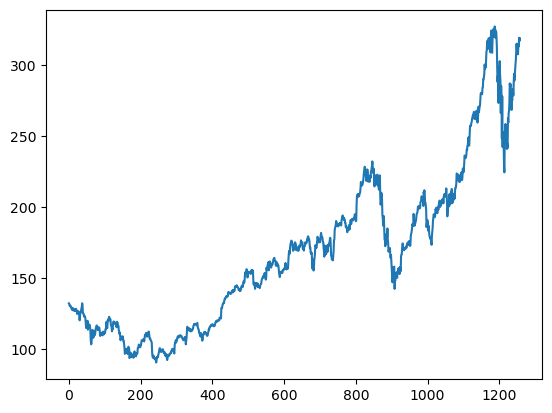

In [432]:
plt.plot(df1)

In [433]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [434]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [435]:
## Splitting the data into training and test data

In [436]:
trainingsize=int(len(df)*0.65)
testsize= len(df1)-trainingsize
train_data,test_data=df1[0:trainingsize,:],df1[trainingsize:len(df1),:1]

In [437]:
trainingsize , testsize

(817, 441)

In [438]:
import numpy
#converting an array value into matrix data set.
def create_dataset(dataset,time_steps=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps),0]
        dataX.append(a)
        dataY.append(dataset[i+time_steps,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [439]:
# reshape into X = t,t+1,t+2,t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [440]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [441]:
print(X_test)

[[0.52651355 0.52837119 0.53119986 ... 0.26154691 0.25187875 0.26483999]
 [0.52837119 0.53119986 0.53871485 ... 0.25187875 0.26483999 0.27273495]
 [0.53119986 0.53871485 0.5461454  ... 0.26483999 0.27273495 0.2766191 ]
 ...
 [0.81875369 0.84256523 0.84210082 ... 0.92544119 0.91771511 0.9483239 ]
 [0.84256523 0.84210082 0.84936249 ... 0.91771511 0.9483239  0.94064004]
 [0.84210082 0.84936249 0.85835515 ... 0.9483239  0.94064004 0.96635143]]


In [442]:
print(X_test.shape)
print(y_test.shape)
y_train.shape

(340, 100)
(340,)


(716,)

In [443]:
# reshape the input to be [sample,timestep,features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [444]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [445]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_37 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_38 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [446]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 136ms/step - loss: 0.0215 - val_loss: 0.0565
Epoch 2/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 3/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 4/100
12/12 [==============================] - 1s 111ms/step - loss: 8.2363e-04 - val_loss: 0.0044
Epoch 5/100
12/12 [==============================] - 1s 112ms/step - loss: 6.9849e-04 - val_loss: 0.0065
Epoch 6/100
12/12 [==============================] - 1s 111ms/step - loss: 7.0763e-04 - val_loss: 0.0047
Epoch 7/100
12/12 [==============================] - 1s 111ms/step - loss: 6.4285e-04 - val_loss: 0.0038
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 6.3808e-04 - val_loss: 0.0037
Epoch 9/100
12/12 [==============================] - 1s 125ms/step - loss: 5.8379e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 1s 126ms/step

12/12 [==============================] - 2s 185ms/step - loss: 2.2028e-04 - val_loss: 0.0010
Epoch 79/100
12/12 [==============================] - 2s 179ms/step - loss: 2.2869e-04 - val_loss: 0.0015
Epoch 80/100
12/12 [==============================] - 2s 165ms/step - loss: 2.1219e-04 - val_loss: 0.0013
Epoch 81/100
12/12 [==============================] - 2s 167ms/step - loss: 2.1536e-04 - val_loss: 0.0015
Epoch 82/100
12/12 [==============================] - 2s 161ms/step - loss: 1.8971e-04 - val_loss: 0.0010
Epoch 83/100
12/12 [==============================] - 2s 170ms/step - loss: 1.9819e-04 - val_loss: 9.5567e-04
Epoch 84/100
12/12 [==============================] - 2s 177ms/step - loss: 1.9394e-04 - val_loss: 0.0010
Epoch 85/100
12/12 [==============================] - 2s 167ms/step - loss: 1.7732e-04 - val_loss: 9.6888e-04
Epoch 86/100
12/12 [==============================] - 2s 178ms/step - loss: 1.7043e-04 - val_loss: 9.2335e-04
Epoch 87/100
12/12 [===========================

In [447]:
## Prediction and Performance Check
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 17ms/step


In [448]:
## Transformation to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [449]:
### Calculate RMSE performance metrics for training data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.1158166797599

In [450]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

235.8491535031112

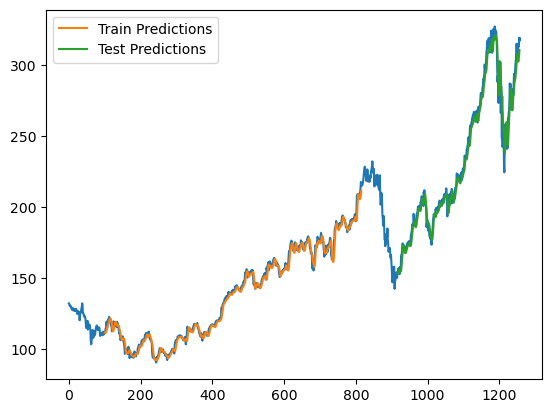

In [451]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.legend()
plt.show()


In [481]:
#Prediction of the Data 
len(test_data)

441

In [482]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [483]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [484]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [485]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9440501]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

8 day output [[0.8866075]]
9 day input [0.93869797 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192
 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9

16 day output [[0.87845474]]
17 day input [0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94405007
 0.93866765 0.929014

24 day output [[0.86248136]]
25 day input [0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.94405007 0.93866765 0.92901492
 0.91876858 0.90930313 0.90119839 0.89471936 0.88990414 0.88660753
 0.88455367 0.88339543 0

In [486]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)


In [487]:
import matplotlib.pyplot as plt

In [488]:
len(df1)

1258

In [489]:
df3 = df1.tolist()
df3.extend(lst_output)

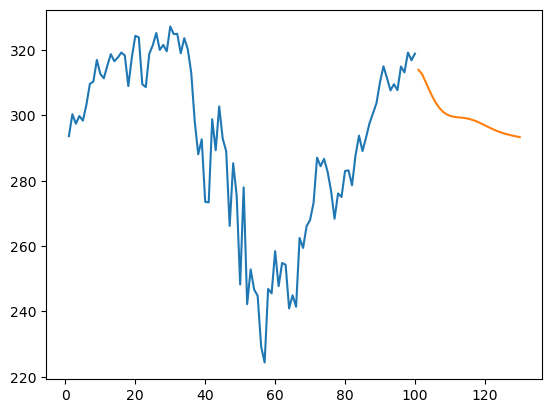

In [490]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

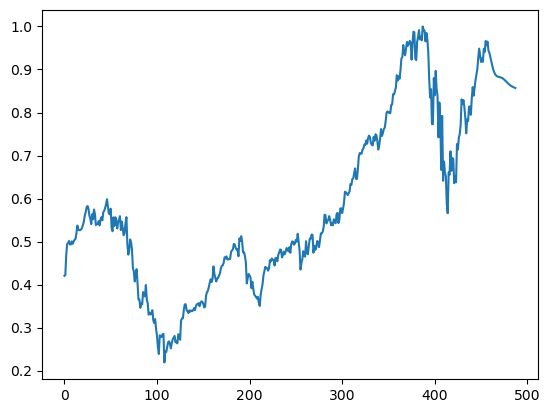

In [491]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

In [494]:
import numpy as np

# Get the predicted values.
predicted_values = model.predict(X_test)

# Get the actual values.
actual_values = y_test

# Calculate the difference between the predicted values and the actual values.
differences = predicted_values - actual_values

# Square the differences.
squared_differences = differences ** 2

# Take the mean of the squared differences.
mse = np.mean(squared_differences)
mse


11/11 [==============================] - 0s 17ms/step


0.08144605474012281

In [497]:
import numpy as np

# Get the predicted values.
predicted_values = model.predict(X_test)

# Get the actual values.
actual_values = y_test

# Calculate the mean absolute error (MAE).
mae = np.mean(np.abs(predicted_values - actual_values))

# Calculate the R-squared metric.
r_squared = 1 - (np.sum((predicted_values - actual_values) ** 2) / np.sum((actual_values - np.mean(actual_values)) ** 2))

mae



11/11 [==============================] - 0s 17ms/step


-666.6234336716814

In [499]:
import numpy as np

# Get the predicted values.
predicted_values = model.predict(X_test)

# Get the actual values.
actual_values = y_test

# Calculate the mean squared error (MSE).
mse = np.mean((predicted_values - actual_values) ** 2)

# Calculate the R-squared metric.
r_squared = 1 - (mse / np.var(actual_values))

r_squared

11/11 [==============================] - 0s 17ms/step


-0.9635983343284746